In [13]:
#importations
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import random as r
import pandas as pd

In [14]:
f = open("/home/roy/PRogramming/data.txt")

In [15]:
def separate(x):
    if x != '':
        return list(map(int,x.split(",")))

In [16]:
adjacencyMatrix = f.read().split("\n")
adjacencyMatrix = list(map(separate,adjacencyMatrix))

In [17]:
adjacencyMatrix = pd.DataFrame(adjacencyMatrix,index = range(1,16),columns = range(1,16))
adjacencyMatrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
9,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [18]:
allpaths = []

In [19]:
def findpaths(graph,source,destination,visited,path):
    visited.append(source)
    path.append(source)
    if source == destination:
        allpaths.append(path.copy())
    else:
        if source in graph:
            for i in graph[source]:
                if i not in visited:
                    findpaths(graph,i,destination,visited,path)
    x = path.pop()
    visited.remove(source)                    

In [20]:
#environment code
class environment:
    def __init__(self):
        self.env = dict()

    def createEnv(self):
        for j in adjacencyMatrix.index:
            for i in adjacencyMatrix.columns:
                if adjacencyMatrix.at[j,i] == 1:
                    if j in self.env:
                        self.env[j].append(i)
                    else:
                        self.env[j] = [i]

    def showEnv(self):
        g = nx.Graph()
        for i in self.env:
            for j in self.env[i]:
               if (i,j) not in g.edges() or (j,i) not in g.edges():  
                g.add_edge(i,j)
                g[i][j]['weight'] = r.randint(a=1,b=10)
        return g                          

In [21]:
#Agent code
class Agent:
    def __init__(self) :
        self.paths = None
    def getRoutes(self,env):
        findpaths(env,1,15,[],[])
        self.paths = allpaths.copy()
        print(r.choice(self.paths))
        # print(min(self.paths, key=len))

In [22]:
#drivers code
e = environment()
e.createEnv()
g = e.showEnv()
pos = nx.spring_layout(g)

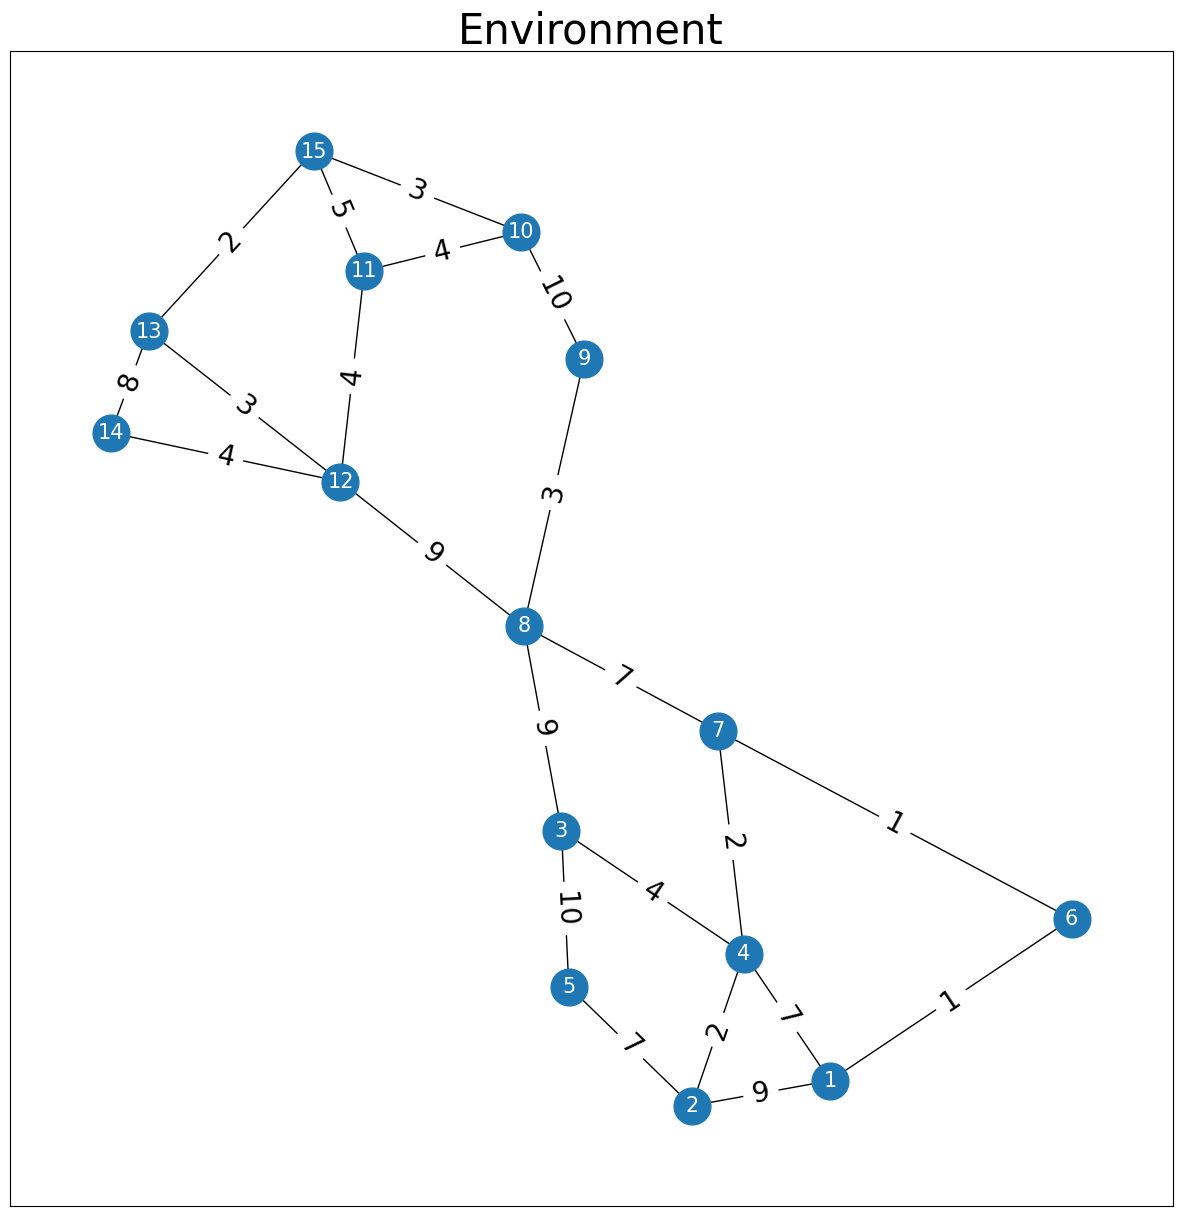

In [23]:
#Visualize
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(g, pos=pos,node_size=700)
nx.draw_networkx_edges(g, pos=pos)
nx.draw_networkx_labels(g, pos, font_size=15,font_color='w')
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,'weight'),font_size=20)
plt.title("Environment",font={"size":30})
plt.show()

In [24]:
#Create agent
a = Agent()
a.getRoutes(e.env) 

[1, 4, 7, 8, 12, 11, 10, 15]
